In [126]:
# Run this cell to import all the libraries you need for this exercise
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [127]:
# STEP 1: Read in the data from 'ex1data1.txt'
f = open('ex1data1.txt', 'r')
x_list = []
y_list = []

for line in f:
    x_str, y_str = line.split(',')
    x_list.append(float(x_str))
    y_list.append(float(y_str))

m = len(x_list)
x_data = np.array(x_list).reshape(m,1)
y_data = np.array(y_list).reshape(m,1)
data = np.c_[x_data,y_data]
f.close()

In [128]:
# STEP 2: Create placeholders for X (Population of City) and Y (Profit)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [129]:
# STEP 3: Create weight and bias, initialized to 0
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [130]:
# STEP 4: Construct model to predict Y (Profit) from X (Population of City)
Y_predicted = X * w + b

In [131]:
# STEP 5: Use the square error as the loss function
cost = tf.reduce_sum(tf.square(Y_predicted - Y))/(2*m)

In [132]:
# STEP 6: Use gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [133]:
with tf.Session() as sess:
    
    # STEP 7: Initialize variables w and b
    sess.run(tf.global_variables_initializer())
    
    # STEP 8: Train the model
    for i in range(0,1500):
        for x, y in data:
            sess.run(optimizer, feed_dict={X:x,Y:y})
    
    # STEP 9: Obtain the values of w and b, cost and Y_predicted
    w_value, b_value = sess.run([w,b])
    cost_value = sess.run(cost, feed_dict={X: x_data, Y: y_data})
    y_predicted = sess.run(Y_predicted, feed_dict={X: x_data, Y: y_data})

In [134]:
# print w_value and b_value and cost_value
print('b_value (previously theta_0) found by gradient descent: ', b_value)
print('w_value (previously theta_1) found by gradient descent: ', w_value)
print('Cost: ', cost_value)

b_value (previously theta_0) found by gradient descent:  -3.5883703
w_value (previously theta_1) found by gradient descent:  1.1236651
Cost:  4.546075


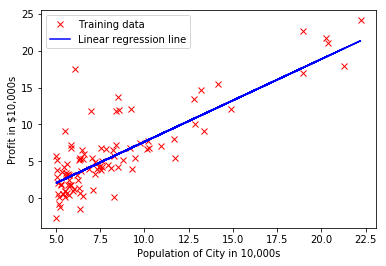

In [135]:
# Plot the linear fit
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(x_data,y_data,marker='x',lw=0,color='r',label='Training data')
plt.plot(x_data,y_predicted,linestyle='-',color='b',label='Linear regression line')
plt.legend()
plt.show()

In [136]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = w_value * 3.5 + b_value
print('For population = 35,000, we predict a profit of:', predict1*10000);
predict2 = w_value * 7 + b_value
print('For population = 70,000, we predict a profit of:', predict2*10000);

For population = 35,000, we predict a profit of: 3444.575071334839
For population = 70,000, we predict a profit of: 42772.8533744812
